In [1]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import random
matplotlib.style.use("ggplot")
random.seed( 30 )

In [2]:
def draw_pitch(pitch, line, orientation,view):
    
    orientation = orientation
    view = view
    line = line
    pitch = pitch
    
    if orientation.lower().startswith("h"):
        
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(49,105)
            plt.ylim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
    
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(93,34,color=line,zorder=5)
        plt.scatter(11,34,color=line,zorder=5)
        plt.scatter(52,34,color=line,zorder=5)

        circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)

        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,69)
        ax.axis('off') # this hides the x and y ticks

        # side and goal lines #
        lx1 = [0,0,68,68,0]
        ly1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)

        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)


        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
 

In [3]:
n = "69321"
file = "data/events" + "/" + n + ".json"
with open (file, "r", encoding='utf-8-sig') as f:
	obj = json.load(f)

In [4]:
df = json_normalize(obj)

In [5]:
df = df[(df["type.name"]=="Pass") & (df["play_pattern.name"] == "Regular Play")]
df = df.dropna(axis=1, how='any')

In [6]:
df.columns

Index(['duration', 'id', 'index', 'location', 'minute', 'pass.angle',
       'pass.end_location', 'pass.height.id', 'pass.height.name',
       'pass.length', 'period', 'play_pattern.id', 'play_pattern.name',
       'player.id', 'player.name', 'position.id', 'position.name',
       'possession', 'possession_team.id', 'possession_team.name', 'second',
       'team.id', 'team.name', 'timestamp', 'type.id', 'type.name'],
      dtype='object')

In [7]:
x = []
y = []
xe = []
ye = []

for loc in df['location'].values:
    x.append(loc[0])
    y.append(loc[1])
    
for loc in df['pass.end_location'].values:
    xe.append(loc[0])
    ye.append(loc[1])

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from scipy.spatial.distance import cdist

In [9]:
kmeans_df = pd.DataFrame()
cols = ['duration', 'pass.angle', 'pass.height.id', 'pass.length']

for c in cols:
    kmeans_df[c] = df[c] 
    
kmeans_df['x_start'] = x
kmeans_df['x_end'] = xe
kmeans_df['y_start'] = y
kmeans_df['y_end'] = ye

scaler = MinMaxScaler()
kmeans_df = scaler.fit_transform(kmeans_df)

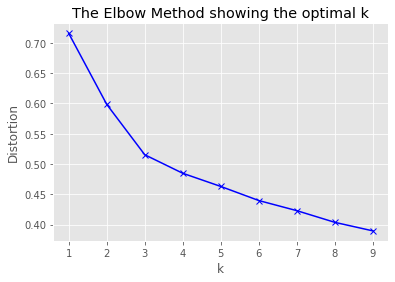

In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(kmeans_df)
    kmeanModel.fit(kmeans_df)
    distortions.append(sum(np.min(cdist(kmeans_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / kmeans_df.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(kmeans_df)
df['cluster'] = kmeans.labels_

In [12]:
us_pass = df[df["team.id"] == 1214]
opp_pass = df[df["team.id"] != 1214]

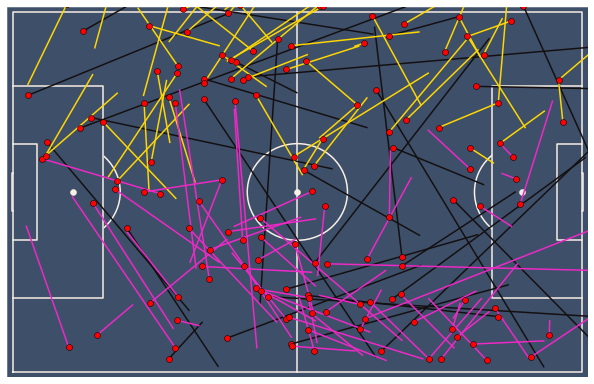

In [13]:
zo = 12 #so we don't forget it later
draw_pitch("#3e4f6a","#faf0e6","h","full")
color = ["#141011", "#ffd700", "#EE29C6"] 
for i in range(0,3):
    df = us_pass[(us_pass["cluster"] == i)]
    
    x = []
    y = []
    xe = []
    ye = []

    for loc in df['location'].values:
        x.append(loc[0])
        y.append(loc[1])

    for loc in df['pass.end_location'].values:
        xe.append(loc[0])
        ye.append(loc[1])
        
    plt.scatter(x,y,color="red",edgecolors="black",zorder=zo,alpha=1)
    plt.plot([x,xe],[y,ye],zorder=11,alpha=1,color=color[i])
plt.show()

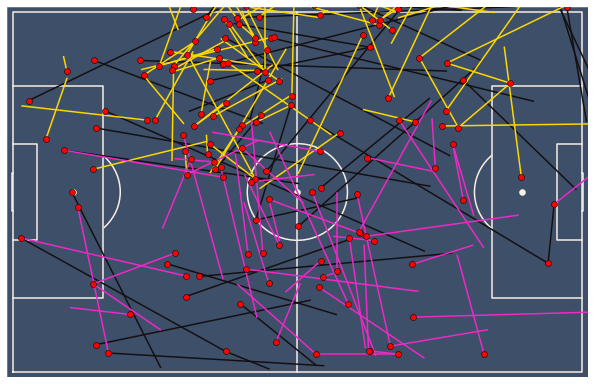

In [14]:
zo = 12 #so we don't forget it later
draw_pitch("#3e4f6a","#faf0e6","h","full")
color = ["#141011", "#ffd700", "#EE29C6"] 
for i in range(0,3):
    df = opp_pass[(opp_pass["cluster"] == i)]
    
    x = []
    y = []
    xe = []
    ye = []

    for loc in df['location'].values:
        x.append(loc[0])
        y.append(loc[1])

    for loc in df['pass.end_location'].values:
        xe.append(loc[0])
        ye.append(loc[1])
        
    plt.scatter(x,y,color="red",edgecolors="black",zorder=zo,alpha=1)
    plt.plot([x,xe],[y,ye],zorder=11,alpha=1,color=color[i])
plt.show()

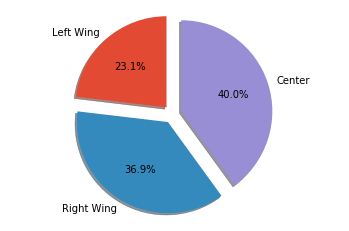

In [15]:
labels = 'Left Wing', 'Right Wing', 'Center'
sizes = [us_pass['cluster'].value_counts()[0], us_pass['cluster'].value_counts()[1], us_pass['cluster'].value_counts()[2]]
explode = (0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

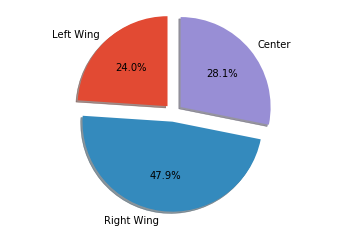

In [16]:
labels = 'Left Wing', 'Right Wing', 'Center'
sizes = [opp_pass['cluster'].value_counts()[0], opp_pass['cluster'].value_counts()[1], opp_pass['cluster'].value_counts()[2]]
explode = (0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()